In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

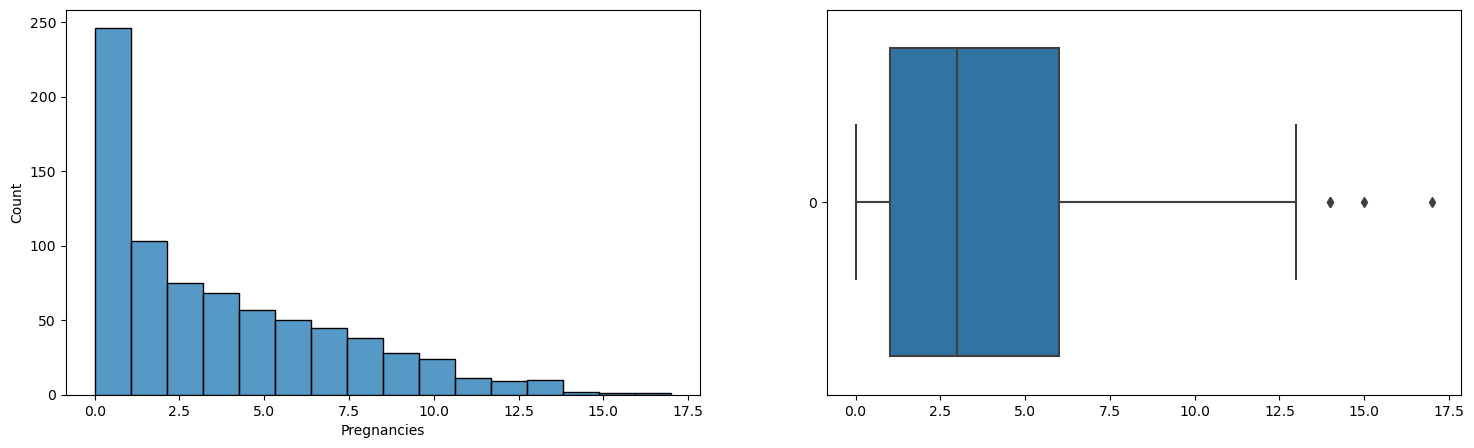

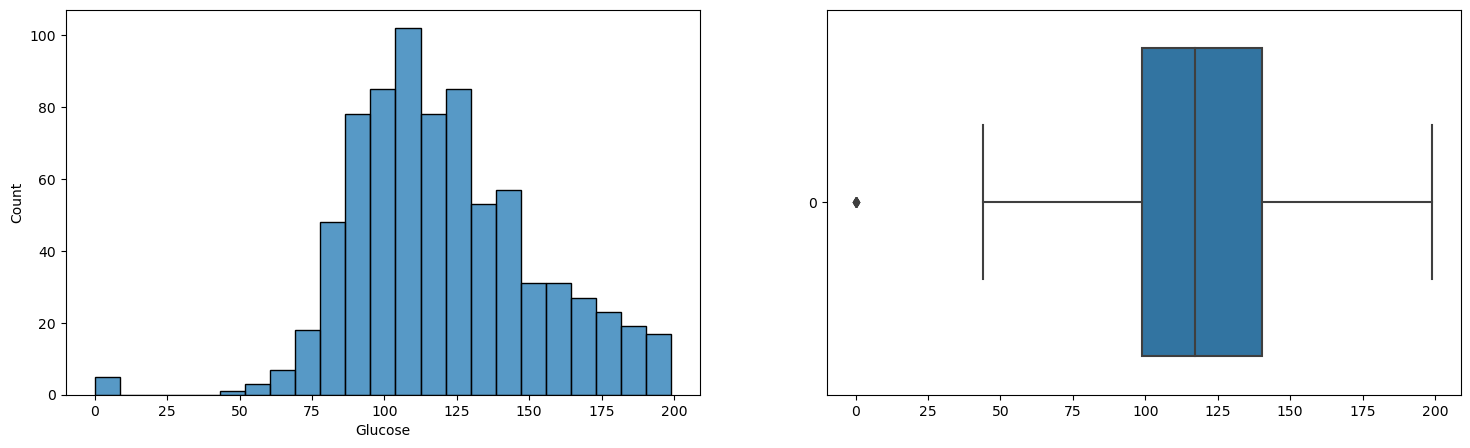

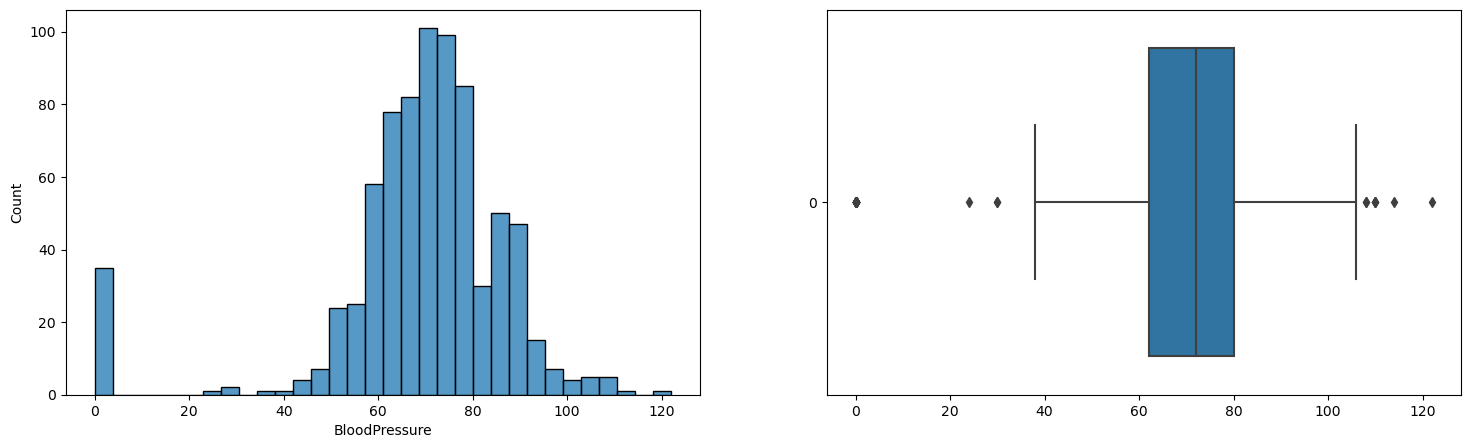

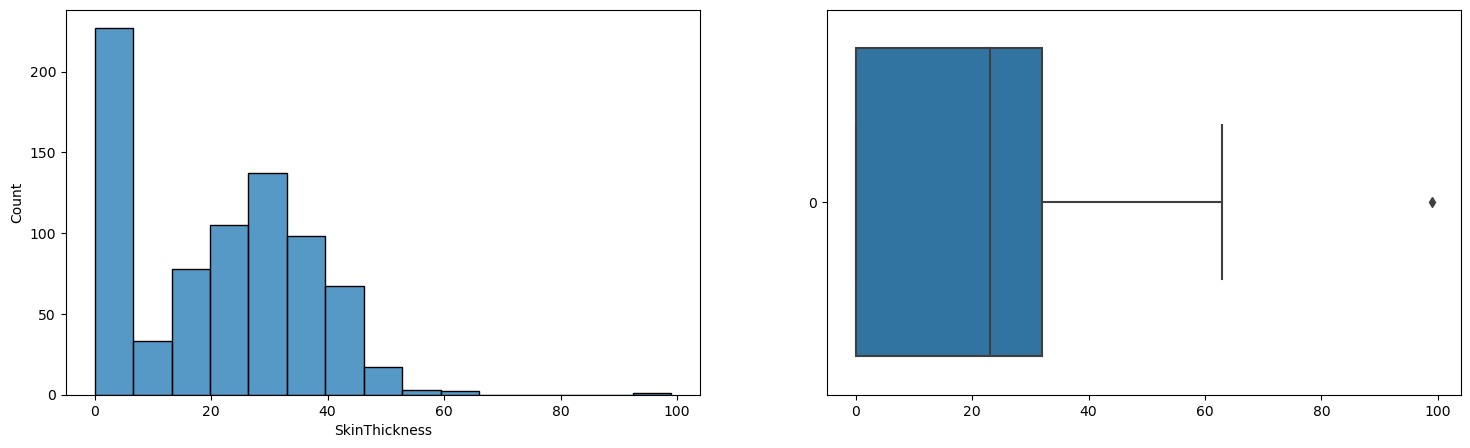

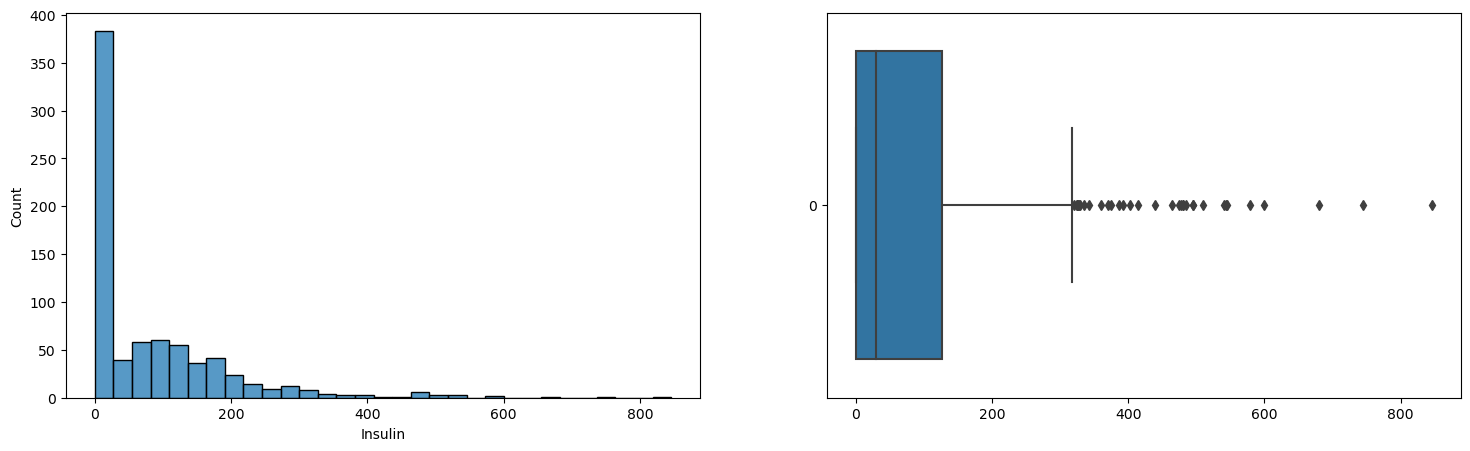

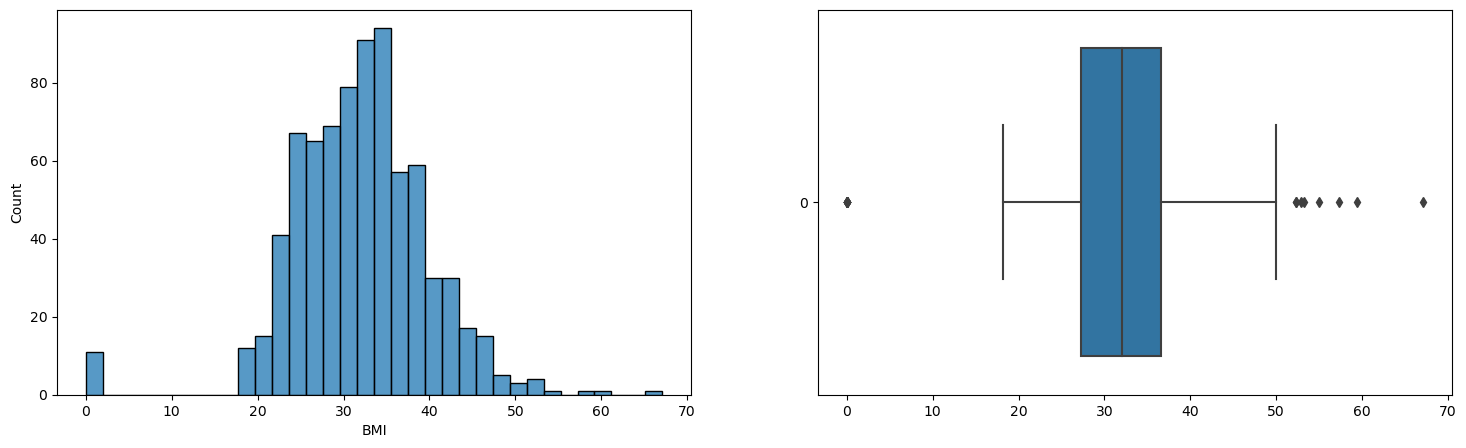

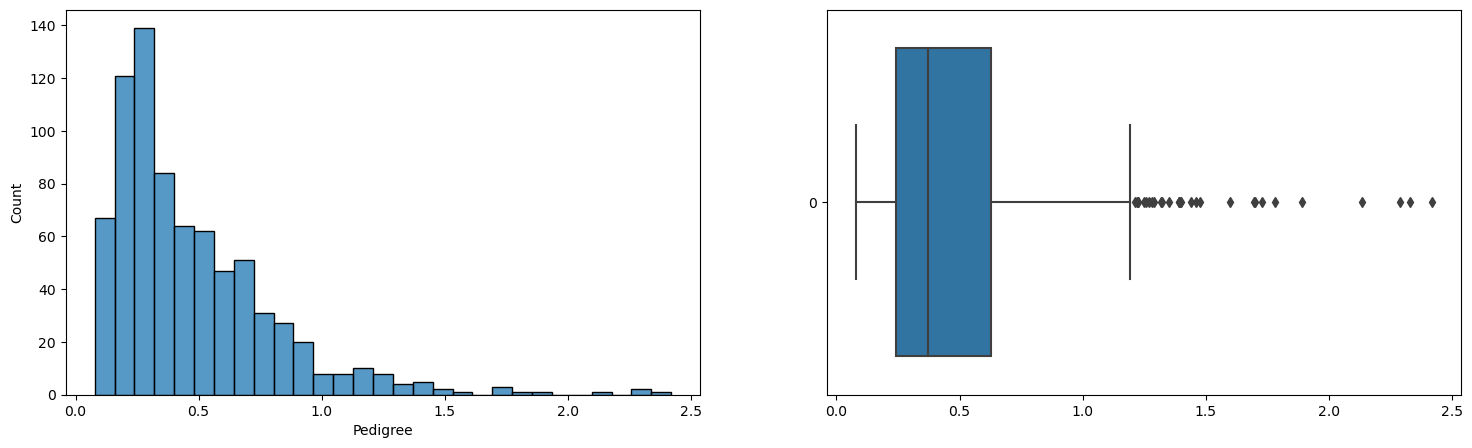

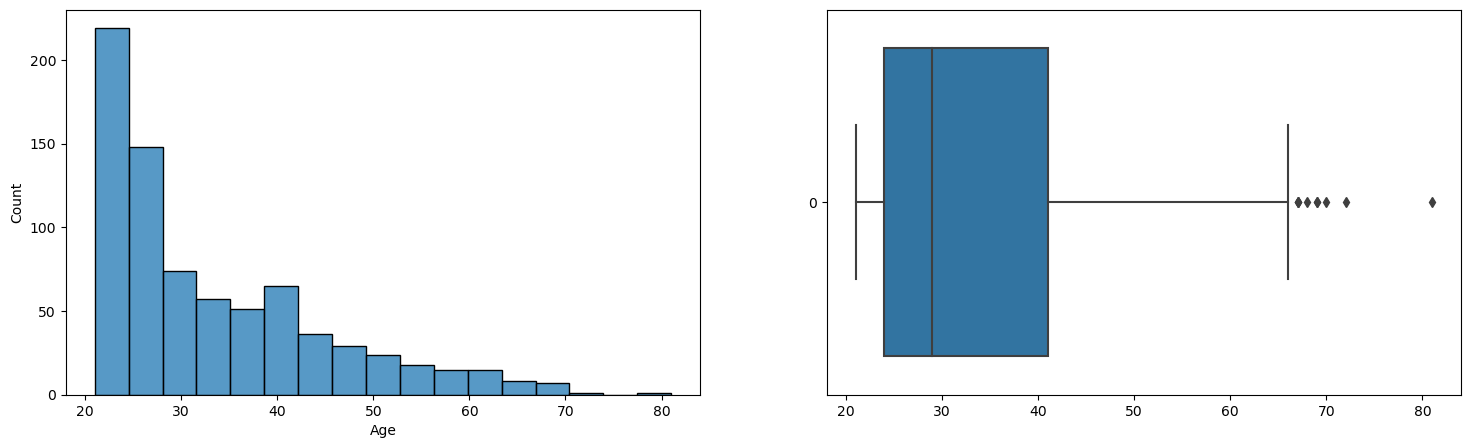

In [22]:
for i in df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']]:
    fig, axes = plt.subplots(1, 2, figsize = (18,5))
    sns.histplot(df[i], ax=axes[0])
    sns.boxplot(df[i], ax=axes[1], orient='h')
    plt.show()

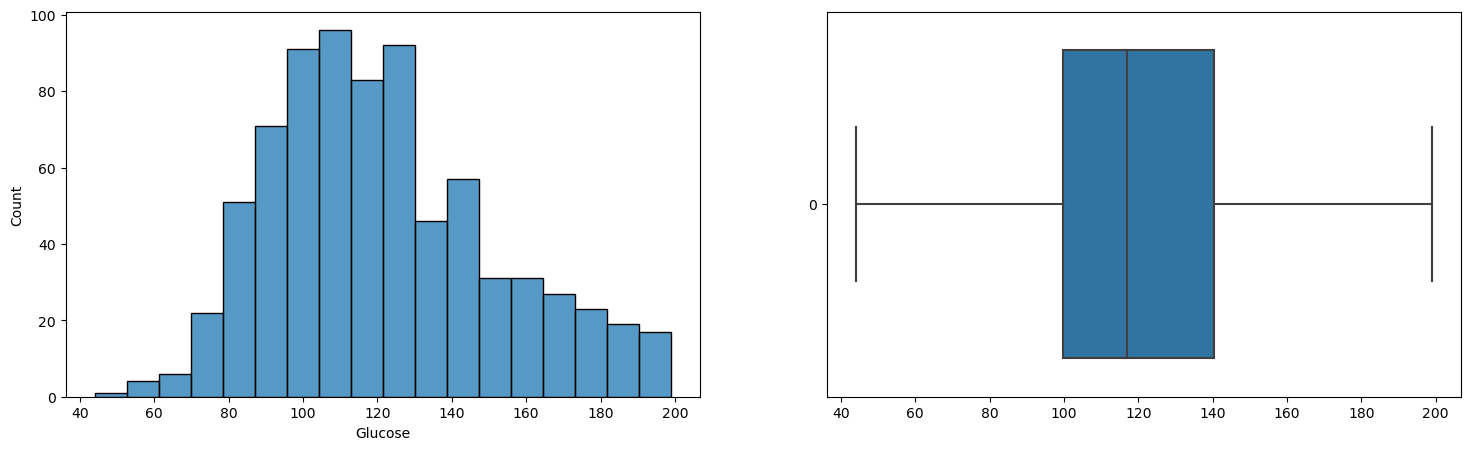

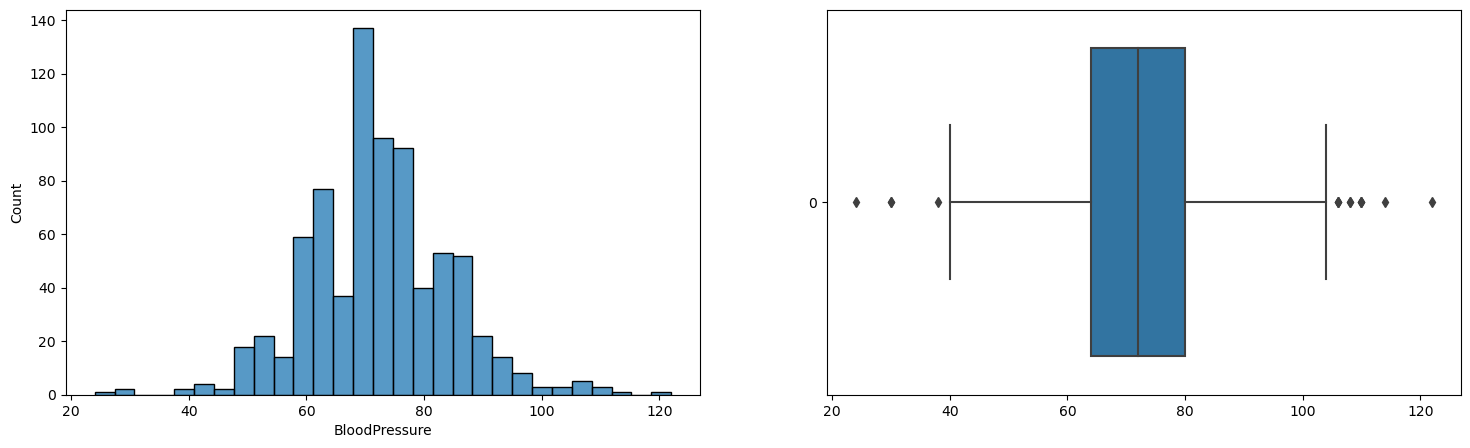

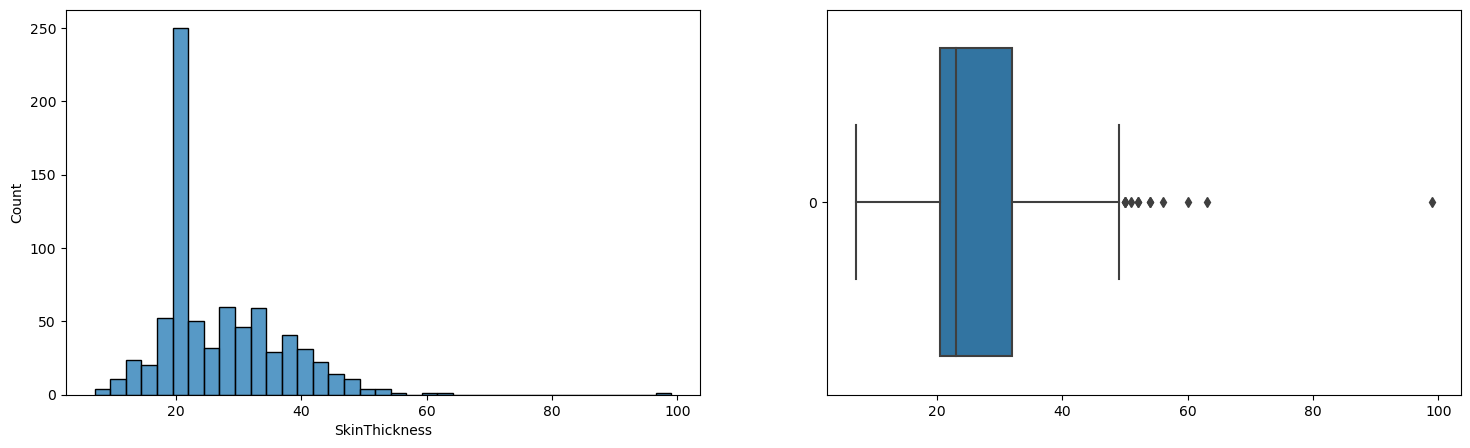

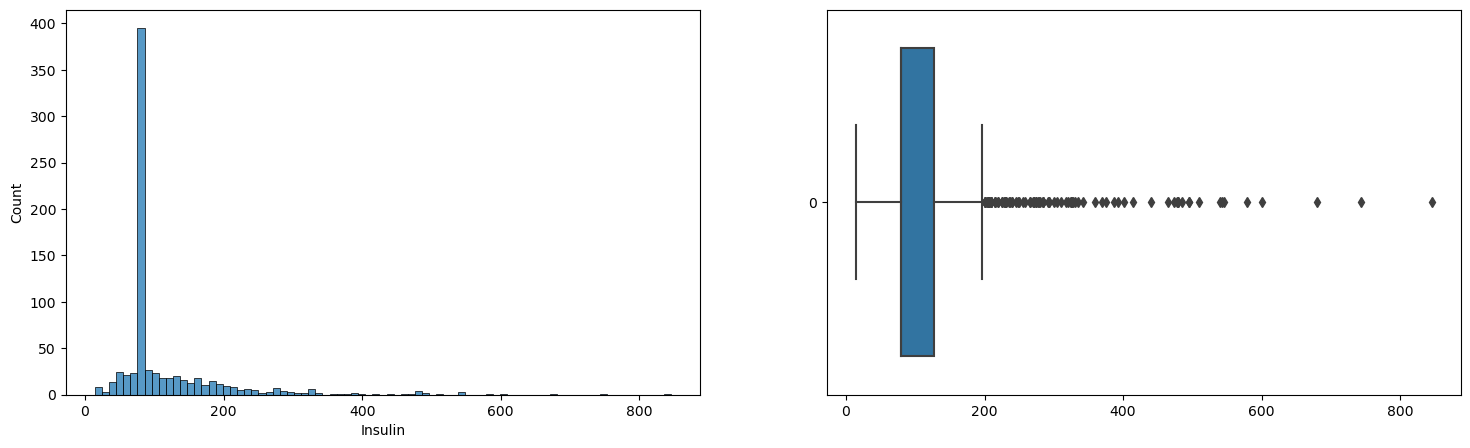

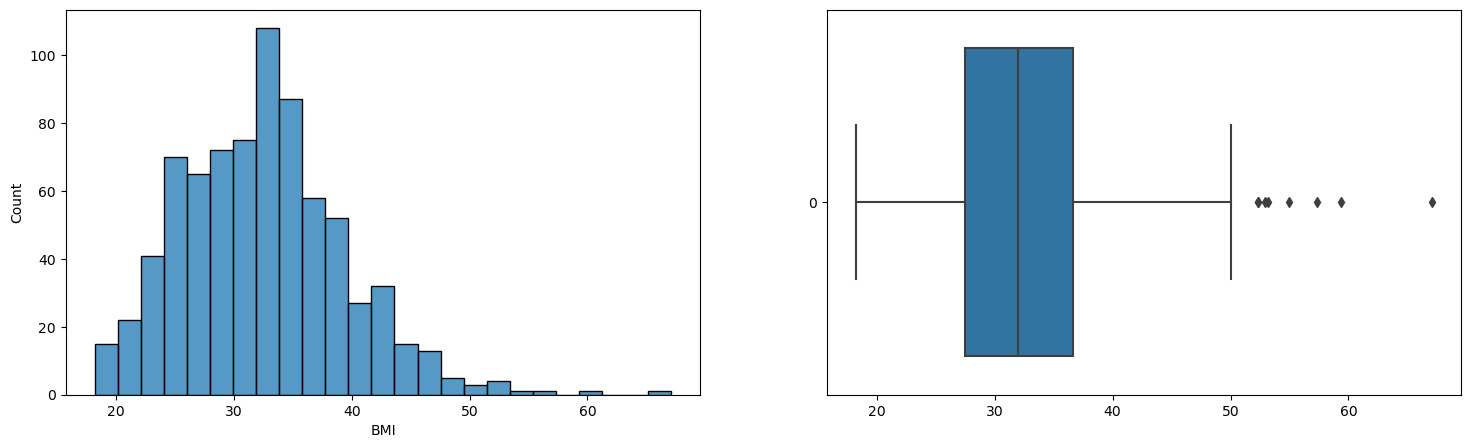

In [23]:
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']

for i in zero_features:
    df[i]=df[i].replace(0, df[i].mean())

for i in df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]:
    fig, axes = plt.subplots(1, 2, figsize = (18,5))
    sns.histplot(df[i], ax=axes[0])
    sns.boxplot(df[i], ax=axes[1], orient='h')
    plt.show()

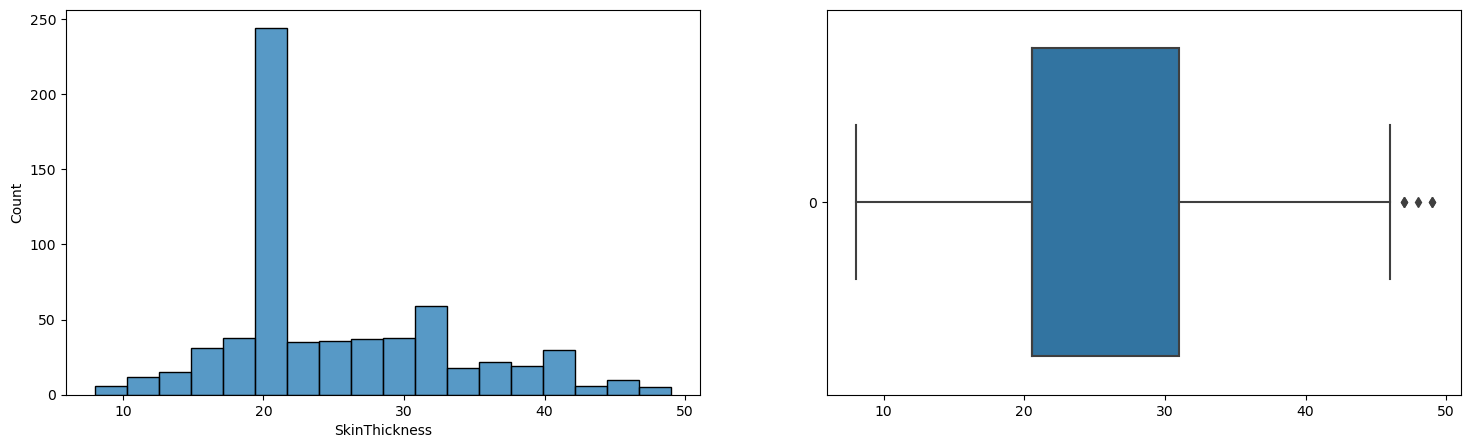

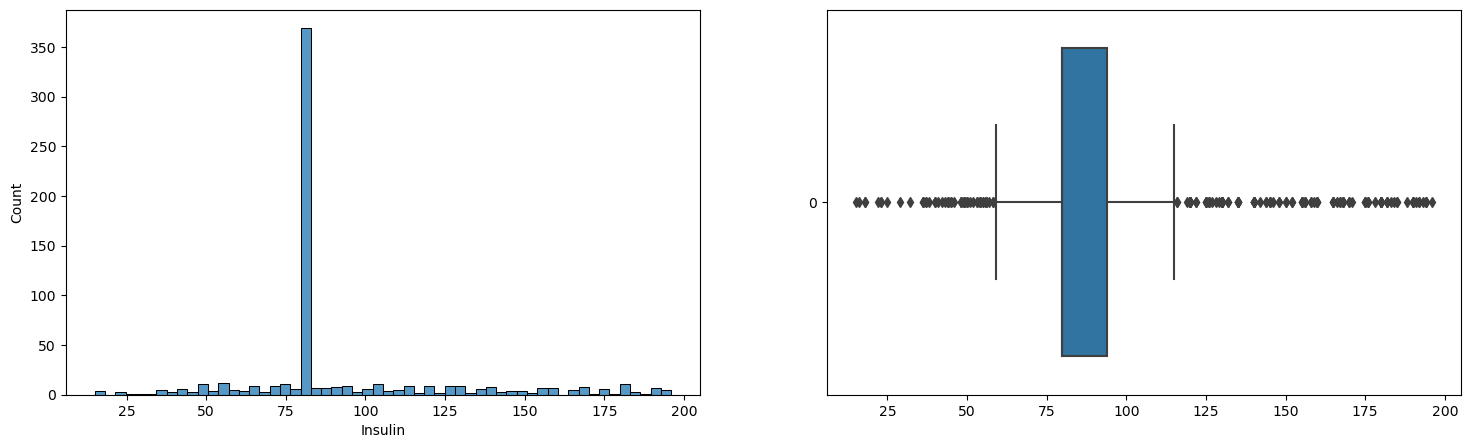

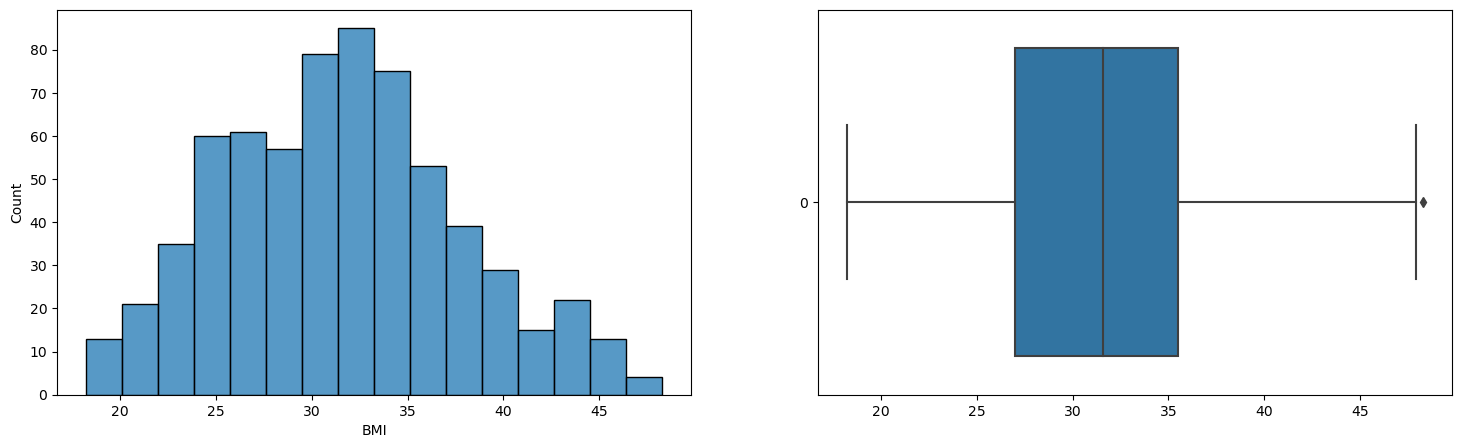

In [24]:
def remove_outliers(col_name, df):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df = df[(df[col_name] <= upper_limit) & (df[col_name] >= lower_limit)]
    return df

col_list = ['SkinThickness','Insulin', 'BMI']

for i in col_list:
    df = remove_outliers(i, df)

for i in df[['SkinThickness', 'Insulin', 'BMI']]:
    fig, axes = plt.subplots(1, 2, figsize = (18,5))
    sns.histplot(df[i], ax=axes[0])
    sns.boxplot(df[i], ax=axes[1], orient='h')
    plt.show()

In [25]:
df.shape

(661, 9)

In [26]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)

(528, 8) (133, 8)


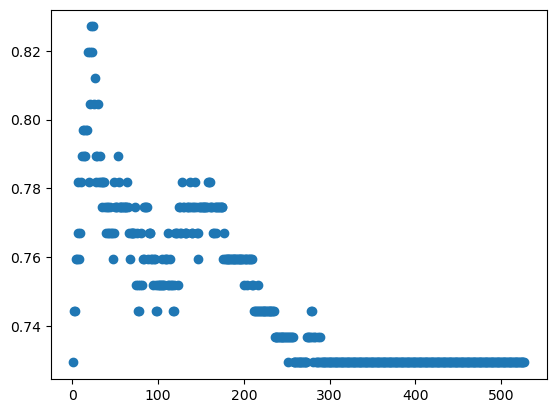

In [27]:
n_value = []
acc_value = []

for i in range (1, int(X_train.shape[0])):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred)
    
    n_value.append(i)
    acc_value.append(knn_accuracy)

plt.scatter(x=n_value, y=acc_value)
plt.show()

In [28]:
import math

k = round(math.sqrt(X_train.shape[0]))

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_error_rate = 1 - knn_accuracy
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {knn_accuracy}")
print(f"Error Rate: {knn_error_rate}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")

Accuracy: 0.8195488721804511
Error Rate: 0.18045112781954886
Precision: 0.75
Recall: 0.5
F1 Score: 0.6


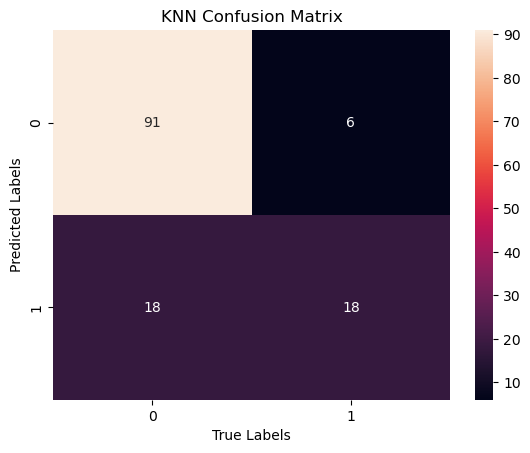

In [29]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d')
plt.ylabel("Predicted Labels")
plt.xlabel("True Labels")
plt.title("KNN Confusion Matrix")
plt.show()